**B3 유해정**\
유방암 결과를 분류하는 서포트 벡터 머신 모델을 만들고 predict method를 이용하여 목표변수 범주를 예측하라. 그리고 모델의 정확도와 confusion matrix를 구하라.
- 데이터 : 유방암.CSV(변수: 31개, 자료 수: 320개)
- 목표변수(diagnosis : 양성(108개), 음성(benign, 212개) 

In [31]:
execfile('setting.py')

In [32]:
# 데이터 구성:Series, DataFrame
import pandas as pd

# 행렬 연산
import numpy as np

# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib

# scaling
from sklearn.preprocessing import StandardScaler

# 데이터 분할:train, test
from sklearn.model_selection import train_test_split

# 로지스틱 회귀
from statsmodels.api import Logit

# 분류모델 평가 함수
from sklearn.metrics import accuracy_score, f1_score 
from sklearn.metrics import confusion_matrix, classification_report

In [33]:
# 워닝 제거 및 폰트 정의

import matplotlib as mpl

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import matplotlib.font_manager as fm
path =  '/usr/share/fonts/opentype/noto/NotoSansCJK-Bold.ttc'
fontprop = fm.FontProperties(fname=path, size=18).get_name()

matplotlib.rc('font', family=fontprop)
matplotlib.rc("axes",unicode_minus=False)

# 그래프 (-) 기호 표시
matplotlib.rc("axes", unicode_minus = False)

In [109]:
# 데이터 분할:train, test
from sklearn.model_selection import train_test_split
# 분류 Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
# 분류 SVM
from sklearn.svm import SVC
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

# 분류모델 평가 함수
from sklearn.metrics import accuracy_score, f1_score 
from sklearn.metrics import confusion_matrix, classification_report

# confusion matrix
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt

# 서포트 벡터 머신

In [35]:
df_raw = pd.read_csv("221026_Big Data 분석_실습화일/2. Big Data 분석/유방암.csv", encoding = 'euc-kr')
df_raw.head()

diagnosis  mean_radius  mean_texture  mean_perimeter  mean_area  \
0        음성        15.12         16.68           98.78      716.6   
1        양성        10.80          9.71           68.77      357.6   
2        음성        18.31         18.58          118.60     1041.0   
3        양성        14.92         14.93           96.45      686.9   
4        양성        12.89         13.12           81.89      515.9   

   mean_smoothness  mean_compactness  mean_concavity  mean_concave_points  \
0          0.08876           0.09588         0.07550              0.04079   
1          0.09594           0.05736         0.02531              0.01698   
2          0.08588           0.08468         0.08169              0.05814   
3          0.08098           0.08549         0.05539              0.03221   
4          0.06955           0.03729         0.02260              0.01171   

   mean_symmetry  ...  worst_radius  worst_texture  worst_perimeter  \
0         0.1594  ...         17.77          20.24           117.70   
1         0.1381  ...         11.60          12.02            73.66   
2         0.1621  ...         21.31          26.36           139.20   
3         0.1687  ...         17.18          18.22           112.00   
4         0.1337  ...         13.62          15.54            87.40   

   worst_area  worst_smoothness  worst_compactness  worst_concavity  \
0       989.5           0.14910             0.3331           0.3327   
1       414.0           0.14360             0.1257           0.1047   
2      1410.0           0.12340             0.2445           0.3538   
3       906.6           0.10650             0.2791           0.3151   
4       577.0           0.09616             0.1147           0.1186   

   worst_concave_points  worst_symmetry  worst_fractal_dimension  
0               0.12520          0.3415                  0.09740  
1               0.04603          0.2090                  0.07699  
2               0.15710          0.3206                  0.06938  
3               0.11470          0.2688                  0.08273  
4               0.05366          0.2309                  0.06915  

[5 rows x 31 columns]

In [36]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                320 non-null    object 
 1   mean_radius              320 non-null    float64
 2   mean_texture             320 non-null    float64
 3   mean_perimeter           320 non-null    float64
 4   mean_area                320 non-null    float64
 5   mean_smoothness          320 non-null    float64
 6   mean_compactness         320 non-null    float64
 7   mean_concavity           320 non-null    float64
 8   mean_concave_points      320 non-null    float64
 9   mean_symmetry            320 non-null    float64
 10  mean_fractal_dimension   320 non-null    float64
 11  radius_error             320 non-null    float64
 12  texture_error            320 non-null    float64
 13  perimeter_error          320 non-null    float64
 14  area_error               3

- 범주형 목표변수 diagnosis, 30개의 수치형 설명변수
- 결측치가 없어 결측치 처리 필요없음

In [37]:
df_raw.describe()

mean_radius  mean_texture  mean_perimeter    mean_area  \
count   320.000000    320.000000      320.000000   320.000000   
mean     15.709703     20.323250      103.050469   807.735937   
std       3.745788      4.150729       25.835984   391.969297   
min       7.691000      9.710000       47.920000   170.400000   
25%      13.050000     17.460000       84.845000   523.900000   
50%      15.125000     20.215000      100.100000   713.050000   
75%      18.520000     22.500000      121.550000  1075.250000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean_smoothness  mean_compactness  mean_concavity  mean_concave_points  \
count       320.000000        320.000000      320.000000           320.000000   
mean          0.099358          0.123252        0.122144             0.066977   
std           0.014249          0.057207        0.084822             0.041732   
min           0.052630          0.026750        0.000000             0.000000   
25%           0.090240          0.081132        0.052770             0.029538   
50%           0.098570          0.115300        0.110850             0.065265   
75%           0.108050          0.155650        0.169550             0.091777   
max           0.163400          0.345400        0.426800             0.201200   

       mean_symmetry  mean_fractal_dimension  ...  worst_radius  \
count     320.000000              320.000000  ...    320.000000   
mean        0.186772                0.062679  ...     18.542406   
std         0.027485                0.007190  ...      5.182210   
min         0.127400                0.049960  ...      8.678000   
25%         0.166900                0.057450  ...     14.657500   
50%         0.184650                0.061445  ...     17.730000   
75%         0.202700                0.066705  ...     22.420000   
max         0.304000                0.097440  ...     36.040000   

       worst_texture  worst_perimeter   worst_area  worst_smoothness  \
count     320.000000       320.000000   320.000000        320.000000   
mean       27.225594       123.221625  1133.463438          0.137678   
std         6.050052        35.960154   640.979627          0.023316   
min        12.020000        54.490000   223.600000          0.085670   
25%        23.275000        95.525000   653.525000          0.122675   
50%        26.880000       118.850000   969.200000          0.138050   
75%        30.937500       148.850000  1538.500000          0.151200   
max        49.540000       251.200000  4254.000000          0.222600   

       worst_compactness  worst_concavity  worst_concave_points  \
count         320.000000       320.000000            320.000000   
mean            0.308713         0.352927              0.145487   
std             0.175225         0.214449              0.067292   
min             0.050360         0.000000              0.000000   
25%             0.180275         0.182950              0.090868   
50%             0.276950         0.339750              0.152700   
75%             0.405675         0.483675              0.197100   
max             1.058000         1.170000              0.291000   

       worst_symmetry  worst_fractal_dimension  
count      320.000000               320.000000  
mean         0.305097                 0.087156  
std          0.069367                 0.020076  
min          0.156500                 0.055040  
25%          0.258700                 0.073475  
50%          0.295800                 0.082640  
75%          0.328125                 0.097745  
max          0.663800                 0.207500  

[8 rows x 30 columns]

In [38]:
# 목표변수 클래스 확인
print(df_raw.value_counts(["diagnosis"]),"\n")

diagnosis
음성           212
양성           108
dtype: int64 



## 데이터 전처리

범주형인 목표변수의 값을 0,1의 수치로 바꾸어줌

In [39]:
#목표변수를 0,1로 바꿈
df_raw.diagnosis.replace({'음성':0, '양성':1}, inplace=True)
df_raw.head()

diagnosis  mean_radius  mean_texture  mean_perimeter  mean_area  \
0          0        15.12         16.68           98.78      716.6   
1          1        10.80          9.71           68.77      357.6   
2          0        18.31         18.58          118.60     1041.0   
3          1        14.92         14.93           96.45      686.9   
4          1        12.89         13.12           81.89      515.9   

   mean_smoothness  mean_compactness  mean_concavity  mean_concave_points  \
0          0.08876           0.09588         0.07550              0.04079   
1          0.09594           0.05736         0.02531              0.01698   
2          0.08588           0.08468         0.08169              0.05814   
3          0.08098           0.08549         0.05539              0.03221   
4          0.06955           0.03729         0.02260              0.01171   

   mean_symmetry  ...  worst_radius  worst_texture  worst_perimeter  \
0         0.1594  ...         17.77          20.24           117.70   
1         0.1381  ...         11.60          12.02            73.66   
2         0.1621  ...         21.31          26.36           139.20   
3         0.1687  ...         17.18          18.22           112.00   
4         0.1337  ...         13.62          15.54            87.40   

   worst_area  worst_smoothness  worst_compactness  worst_concavity  \
0       989.5           0.14910             0.3331           0.3327   
1       414.0           0.14360             0.1257           0.1047   
2      1410.0           0.12340             0.2445           0.3538   
3       906.6           0.10650             0.2791           0.3151   
4       577.0           0.09616             0.1147           0.1186   

   worst_concave_points  worst_symmetry  worst_fractal_dimension  
0               0.12520          0.3415                  0.09740  
1               0.04603          0.2090                  0.07699  
2               0.15710          0.3206                  0.06938  
3               0.11470          0.2688                  0.08273  
4               0.05366          0.2309                  0.06915  

[5 rows x 31 columns]

In [61]:
#데이터 분리
df_raw_x = df_raw.drop("diagnosis",axis=1)
df_raw_y = df_raw["diagnosis"]
df_raw_y.head()

0    0
1    1
2    0
3    1
4    1
Name: diagnosis, dtype: int64

In [41]:
df_raw_x.head()

mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
0        15.12         16.68           98.78      716.6          0.08876   
1        10.80          9.71           68.77      357.6          0.09594   
2        18.31         18.58          118.60     1041.0          0.08588   
3        14.92         14.93           96.45      686.9          0.08098   
4        12.89         13.12           81.89      515.9          0.06955   

   mean_compactness  mean_concavity  mean_concave_points  mean_symmetry  \
0           0.09588         0.07550              0.04079         0.1594   
1           0.05736         0.02531              0.01698         0.1381   
2           0.08468         0.08169              0.05814         0.1621   
3           0.08549         0.05539              0.03221         0.1687   
4           0.03729         0.02260              0.01171         0.1337   

   mean_fractal_dimension  ...  worst_radius  worst_texture  worst_perimeter  \
0                 0.05986  ...         17.77          20.24           117.70   
1                 0.06400  ...         11.60          12.02            73.66   
2                 0.05425  ...         21.31          26.36           139.20   
3                 0.05669  ...         17.18          18.22           112.00   
4                 0.05581  ...         13.62          15.54            87.40   

   worst_area  worst_smoothness  worst_compactness  worst_concavity  \
0       989.5           0.14910             0.3331           0.3327   
1       414.0           0.14360             0.1257           0.1047   
2      1410.0           0.12340             0.2445           0.3538   
3       906.6           0.10650             0.2791           0.3151   
4       577.0           0.09616             0.1147           0.1186   

   worst_concave_points  worst_symmetry  worst_fractal_dimension  
0               0.12520          0.3415                  0.09740  
1               0.04603          0.2090                  0.07699  
2               0.15710          0.3206                  0.06938  
3               0.11470          0.2688                  0.08273  
4               0.05366          0.2309                  0.06915  

[5 rows x 30 columns]

- 잘 분리된 것을 확인

In [42]:
# 설명변수, 목표변수 데이터 구분
df_raw_x = df_raw.drop("diagnosis", axis = 1, inplace = False)
df_raw_y = df_raw["diagnosis"] 

# 데이터 분할 train_test_split(X: 설명변수, Y: 목표변수, test_size = test 데이터 비율)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(
    df_raw_x, df_raw_y, test_size = 0.4, random_state = 1234) 

print("분할 전 설명변수 데이터 :", df_raw_x.shape)
print("분할 후 설명변수 데이터 :Train", df_train_x.shape, "  Test",df_test_x.shape)

분할 전 설명변수 데이터 : (320, 30)
분할 후 설명변수 데이터 :Train (192, 30)   Test (128, 30)


## 모델 생성

### raw data 데이터 이용

In [43]:
svm_uncustomized = SVC(random_state=1234)
svm_uncustomized.fit(df_train_x, df_train_y)
# train 데이터 셋 정확도
print("Accuracy on training set: {:.3f}".format(svm_uncustomized.score(df_train_x, df_train_y)))
# test 데이터 셋 정확도
print("Accuracy on test set: {:.3f}".format(svm_uncustomized.score(df_test_x, df_test_y)))

SVC(random_state=1234)

Accuracy on training set: 0.885
Accuracy on test set: 0.891


train set에 대한 정확도 88.5%, test set에 대한 정확도 89.1%로 과적합되진 않음 -> 서포트벡터머신이 거리 기반이기 때문에 과소적합 된 것 같다.

In [44]:
# 실행옵션 확인
print(svm_uncustomized.get_params().keys())
print(svm_uncustomized.get_params().values())

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])
dict_values([1.0, False, 200, None, 0.0, 'ovr', 3, 'scale', 'rbf', -1, False, 1234, True, 0.001, False])


- 디폴트 옵션 C : 1.0, kernel : rbf, degree : 3

#### C: Cost 변경에 따른 모델 성능

In [45]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# c: 규제(0.01, 0.1, 1, 10, 100)
para_c = [10 **c for c in range(-2, 4)]
# para_c = [0.1 * c for c in range(1, 11)] )] # C 변화 구간 변경: 0.1~1.0

for v_C in para_c:
    svm = SVC(C = v_C, random_state = 1234)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x, df_train_y))
    test_accuracy.append(svm.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_c = pd.DataFrame()
df_accuracy_c["C"] = para_c
df_accuracy_c["TrainAccuracy"] = train_accuracy
df_accuracy_c["TestAccuracy"] = test_accuracy

SVC(C=0.01, random_state=1234)

SVC(C=0.1, random_state=1234)

SVC(C=1, random_state=1234)

SVC(C=10, random_state=1234)

SVC(C=100, random_state=1234)

SVC(C=1000, random_state=1234)

In [46]:
para_c

[0.01, 0.1, 1, 10, 100, 1000]

In [47]:
# C별 정확도 테이블
df_accuracy_c.round(3)

C  TrainAccuracy  TestAccuracy
0     0.01          0.599         0.758
1     0.10          0.854         0.859
2     1.00          0.885         0.891
3    10.00          0.906         0.922
4   100.00          0.927         0.930
5  1000.00          0.948         0.961

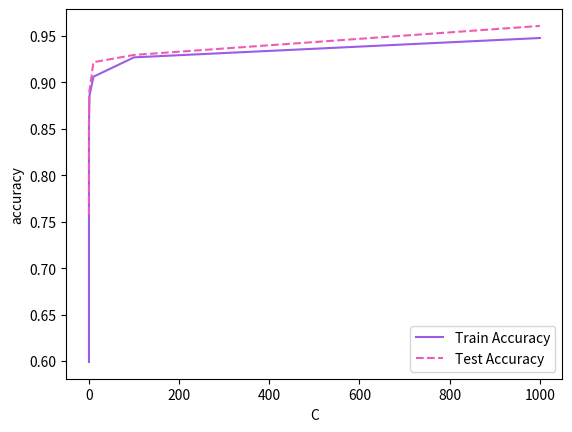

In [48]:
# 정확도를 그래프로 표현
plt.plot(para_c, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_c, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("C")
plt.legend();

- C의 영향이 크지 않음 -> 미지정

#### Gamma: 훈련 샘플이 미치는 영향의 범위를 변경

In [49]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# gamma: 규제(0.01, 0.1, 1, 10)
para_gamma = [10 **gamma for gamma in range(-2, 2)]

for v_gamma in para_gamma:
    svm = SVC(gamma = v_gamma, random_state = 1234)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x, df_train_y))
    test_accuracy.append(svm.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_gamma = pd.DataFrame()
df_accuracy_gamma["gamma"] = para_gamma
df_accuracy_gamma["TrainAccuracy"] = train_accuracy
df_accuracy_gamma["TestAccuracy"] = test_accuracy

SVC(gamma=0.01, random_state=1234)

SVC(gamma=0.1, random_state=1234)

SVC(gamma=1, random_state=1234)

SVC(gamma=10, random_state=1234)

In [50]:
para_gamma

[0.01, 0.1, 1, 10]

In [51]:
# Gamma별 정확도 테이블
df_accuracy_gamma.round(4)

gamma  TrainAccuracy  TestAccuracy
0   0.01            1.0        0.7812
1   0.10            1.0        0.7656
2   1.00            1.0        0.7656
3  10.00            1.0        0.7656

In [52]:
import numpy as np
# 정확도를 그래프로 표현
plt.plot(para_gamma, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_gamma, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("log10(gamma)")
plt.legend();

- gamma도 정확도에 별다른 영향을 끼치지 않음 -> 미지정

#### 최종 모델

In [53]:
# 최종 모델
svc_final = SVC(random_state=1234)
svc_final.fit(df_train_x, df_train_y)
# 평가
y_pred = svc_final.predict(df_test_x)

# train 데이터 셋 정확도
print("Accucary on training set: {:.3f}".format(svc_final.score(df_train_x, df_train_y)))
# test 데이터 셋 정확도
print("Accuracy on test set: {:.3f}\n".format(svc_final.score(df_test_x, df_test_y)))
# confusion matrix
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

# 목표변수의 빈도 불균형 : f1 score로 모델 평가 
print(classification_report(df_test_y, y_pred, digits=3))

SVC(random_state=1234)

Accucary on training set: 0.885
Accuracy on test set: 0.891

Confusion matrix: 
[[89  8]
 [ 6 25]]
              precision    recall  f1-score   support

           0      0.937     0.918     0.927        97
           1      0.758     0.806     0.781        31

    accuracy                          0.891       128
   macro avg      0.847     0.862     0.854       128
weighted avg      0.893     0.891     0.892       128



- 1기준 f1-score 78.1%

#### grid search

In [54]:
estimator = SVC(random_state=1234)
# 구하고자 하는 parameter와 범위
param_grid = {"C": para_c,
              "gamma": para_gamma}
# 정확도가 높은 최적 parameter 찾기
grid_rf = GridSearchCV(estimator, param_grid, scoring="accuracy", n_jobs = -1)
grid_rf.fit(df_train_x, df_train_y)
print("best estimator model: \n{}".format(grid_rf.best_estimator_))
print("\nbest parameter: \n{}".format(grid_rf.best_params_))
print("\nbest score: \n{}".format(grid_rf.best_score_.round(3)))

GridSearchCV(estimator=SVC(random_state=1234), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': [0.01, 0.1, 1, 10]},
             scoring='accuracy')

best estimator model: 
SVC(C=10, gamma=0.01, random_state=1234)

best parameter: 
{'C': 10, 'gamma': 0.01}

best score: 
0.693


- 그리드서치로 찾은 c=10, gamma=0.01일 때 교차검증 스코어 69.3%

### scale 변환 데이터 이용

#### scale 변환

In [62]:
# 변수명 저장
v_feature_names = df_train_x.columns
# StandardScaler 적용
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_raw_x)
df_scaled = pd.DataFrame(df_scaled, columns=v_feature_names)
df_scaled.head()

mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
0    -0.157678     -0.879112       -0.165550  -0.232872        -0.744948   
1    -1.312779     -2.560965       -1.328928  -1.150194        -0.240274   
2     0.695279     -0.420644        0.602798   0.596040        -0.947380   
3    -0.211154     -1.301385       -0.255876  -0.308762        -1.291796   
4    -0.753945     -1.738136       -0.820314  -0.745704        -2.095198   

   mean_compactness  mean_concavity  mean_concave_points  mean_symmetry  \
0         -0.479220       -0.550769            -0.628488      -0.997431   
1         -1.153621       -1.143404            -1.199934      -1.773612   
2         -0.675307       -0.477679            -0.212084      -0.899042   
3         -0.661126       -0.788224            -0.834410      -0.658535   
4         -1.505004       -1.175403            -1.326415      -1.933950   

   mean_fractal_dimension  ...  worst_radius  worst_texture  worst_perimeter  \
0               -0.392627  ...     -0.149283      -1.156442        -0.153789   
1                0.184077  ...     -1.341759      -2.517236        -1.380396   
2               -1.174101  ...      0.534893      -0.143296         0.445031   
3               -0.834209  ...     -0.263312      -1.490846        -0.312546   
4               -0.956793  ...     -0.951354      -1.934512        -0.997708   

   worst_area  worst_smoothness  worst_compactness  worst_concavity  \
0   -0.224951          0.490637           0.139396        -0.094470   
1   -1.124201          0.254373          -1.046076        -1.159323   
2    0.432104         -0.613360          -0.367031         0.004076   
3   -0.354487         -1.339335          -0.169261        -0.176669   
4   -0.869505         -1.783511          -1.108951        -1.094404   

   worst_concave_points  worst_symmetry  worst_fractal_dimension  
0             -0.301949        0.525611                 0.511081  
1             -1.480312       -1.387506                -0.507149  
2              0.172850        0.223844                -0.886803  
3             -0.458230       -0.524077                -0.220788  
4             -1.366747       -1.071301                -0.898278  

[5 rows x 30 columns]

In [63]:
# 데이터 분할
df_scaled_train_x, df_scaled_test_x = train_test_split(df_scaled, test_size = 0.4,random_state = 1234)
print("train data X size : {}".format(df_scaled_train_x.shape))
print("train data Y size : {}".format(df_scaled_test_x.shape))

train data X size : (192, 30)
train data Y size : (128, 30)


#### scale 조절 후 SVC 모델 재실행

In [64]:
svm_scaled = SVC(random_state=1234)
svm_scaled.fit(df_scaled_train_x, df_train_y)
# train 데이터 셋 정확도
print("Accuracy on training set: {:.3f}".format(svm_scaled.score(df_scaled_train_x, df_train_y)))
# test 데이터 셋 정확도
print("Accuracy on test set: {:.3f}".format(svm_scaled.score(df_scaled_test_x, df_test_y)))

SVC(random_state=1234)

Accuracy on training set: 0.995
Accuracy on test set: 0.961


#### C: Cost 변경에 따른 모델 성능

In [65]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# c: 규제(0.1 ~2.0)
para_c = [c * 0.2 for c in range(1,21)]
# para_c = [10 **c for c in range(-2, 3)]

for v_C in para_c:
    svm = SVC(C = v_C, random_state = 1234)
    svm.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(svm.score(df_scaled_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_c = pd.DataFrame()
df_accuracy_c["C"] = para_c
df_accuracy_c["TrainAccuracy"] = train_accuracy
df_accuracy_c["TestAccuracy"] = test_accuracy

SVC(C=0.2, random_state=1234)

SVC(C=0.4, random_state=1234)

SVC(C=0.6000000000000001, random_state=1234)

SVC(C=0.8, random_state=1234)

SVC(random_state=1234)

SVC(C=1.2000000000000002, random_state=1234)

SVC(C=1.4000000000000001, random_state=1234)

SVC(C=1.6, random_state=1234)

SVC(C=1.8, random_state=1234)

SVC(C=2.0, random_state=1234)

SVC(C=2.2, random_state=1234)

SVC(C=2.4000000000000004, random_state=1234)

SVC(C=2.6, random_state=1234)

SVC(C=2.8000000000000003, random_state=1234)

SVC(C=3.0, random_state=1234)

SVC(C=3.2, random_state=1234)

SVC(C=3.4000000000000004, random_state=1234)

SVC(C=3.6, random_state=1234)

SVC(C=3.8000000000000003, random_state=1234)

SVC(C=4.0, random_state=1234)

In [66]:
# C별 정확도 테이블 
df_accuracy_c.round(3)

C  TrainAccuracy  TestAccuracy
0   0.2          0.969         0.930
1   0.4          0.979         0.938
2   0.6          0.995         0.938
3   0.8          0.995         0.953
4   1.0          0.995         0.961
5   1.2          0.995         0.961
6   1.4          0.995         0.961
7   1.6          0.995         0.961
8   1.8          0.995         0.961
9   2.0          0.995         0.961
10  2.2          0.995         0.961
11  2.4          0.995         0.961
12  2.6          0.995         0.961
13  2.8          0.995         0.961
14  3.0          0.995         0.961
15  3.2          0.995         0.961
16  3.4          0.995         0.961
17  3.6          0.995         0.961
18  3.8          0.995         0.961
19  4.0          0.995         0.961

In [67]:
# 정확도를 그래프로 표현
plt.plot(para_c, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_c, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("C")
plt.legend();

- c = 0.6 이후로 train 모델은 과적합, test 모델의 성능은 1이후 변화가 보이지 않음
- ~1까지의 세밀한 확인이 필요할 것 같습니다

In [87]:
#범위를 재조정해 다시 확인
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# c: 규제(0.1 ~2.0)
para_c = [c * 0.05 for c in range(1,21)]
# para_c = [10 **c for c in range(-2, 3)]

for v_C in para_c:
    svm = SVC(C = v_C, random_state = 1234)
    svm.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(svm.score(df_scaled_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_c = pd.DataFrame()
df_accuracy_c["C"] = para_c
df_accuracy_c["TrainAccuracy"] = train_accuracy
df_accuracy_c["TestAccuracy"] = test_accuracy

SVC(C=0.05, random_state=1234)

SVC(C=0.1, random_state=1234)

SVC(C=0.15000000000000002, random_state=1234)

SVC(C=0.2, random_state=1234)

SVC(C=0.25, random_state=1234)

SVC(C=0.30000000000000004, random_state=1234)

SVC(C=0.35000000000000003, random_state=1234)

SVC(C=0.4, random_state=1234)

SVC(C=0.45, random_state=1234)

SVC(C=0.5, random_state=1234)

SVC(C=0.55, random_state=1234)

SVC(C=0.6000000000000001, random_state=1234)

SVC(C=0.65, random_state=1234)

SVC(C=0.7000000000000001, random_state=1234)

SVC(C=0.75, random_state=1234)

SVC(C=0.8, random_state=1234)

SVC(C=0.8500000000000001, random_state=1234)

SVC(C=0.9, random_state=1234)

SVC(C=0.9500000000000001, random_state=1234)

SVC(random_state=1234)

In [88]:
# C별 정확도 테이블 
df_accuracy_c.round(3)

C  TrainAccuracy  TestAccuracy
0   0.05          0.964         0.898
1   0.10          0.964         0.906
2   0.15          0.964         0.922
3   0.20          0.969         0.930
4   0.25          0.969         0.930
5   0.30          0.974         0.930
6   0.35          0.979         0.930
7   0.40          0.979         0.938
8   0.45          0.979         0.938
9   0.50          0.984         0.930
10  0.55          0.984         0.938
11  0.60          0.995         0.938
12  0.65          0.995         0.945
13  0.70          0.995         0.945
14  0.75          0.995         0.945
15  0.80          0.995         0.953
16  0.85          0.995         0.953
17  0.90          0.995         0.953
18  0.95          0.995         0.953
19  1.00          0.995         0.961

In [89]:
# 정확도를 그래프로 표현
plt.plot(para_c, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_c, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("C")
plt.legend();

- 1.0까지 증가함에 따라 train과 test 모델의 성능이 좋아진다.
- train과 test 성능의 차이가 가장 적은 1 선택

#### Gamma: 훈련 샘플이 미치는 영향의 범위를 변경

In [90]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# para_gamma = [10 **gamma for gamma in range(-2, 2)] # 0.01, 0.1, 1, 10)
para_gamma = [0.05 * gamma for gamma in range(1, 16)] # 0.05 ~ 0.70

for v_gamma in para_gamma:
    svm = SVC(gamma = v_gamma, C=1, random_state = 1234)
    svm.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(svm.score(df_scaled_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_gamma = pd.DataFrame()
df_accuracy_gamma["gamma"] = para_gamma
df_accuracy_gamma["TrainAccuracy"] = train_accuracy
df_accuracy_gamma["TestAccuracy"] = test_accuracy

SVC(C=1, gamma=0.05, random_state=1234)

SVC(C=1, gamma=0.1, random_state=1234)

SVC(C=1, gamma=0.15000000000000002, random_state=1234)

SVC(C=1, gamma=0.2, random_state=1234)

SVC(C=1, gamma=0.25, random_state=1234)

SVC(C=1, gamma=0.30000000000000004, random_state=1234)

SVC(C=1, gamma=0.35000000000000003, random_state=1234)

SVC(C=1, gamma=0.4, random_state=1234)

SVC(C=1, gamma=0.45, random_state=1234)

SVC(C=1, gamma=0.5, random_state=1234)

SVC(C=1, gamma=0.55, random_state=1234)

SVC(C=1, gamma=0.6000000000000001, random_state=1234)

SVC(C=1, gamma=0.65, random_state=1234)

SVC(C=1, gamma=0.7000000000000001, random_state=1234)

SVC(C=1, gamma=0.75, random_state=1234)

In [91]:
para_gamma

[0.05,
 0.1,
 0.15000000000000002,
 0.2,
 0.25,
 0.30000000000000004,
 0.35000000000000003,
 0.4,
 0.45,
 0.5,
 0.55,
 0.6000000000000001,
 0.65,
 0.7000000000000001,
 0.75]

In [92]:
# Gamma별 정확도 테이블 
df_accuracy_gamma.round(3)

gamma  TrainAccuracy  TestAccuracy
0    0.05          0.995         0.938
1    0.10          1.000         0.922
2    0.15          1.000         0.906
3    0.20          1.000         0.906
4    0.25          1.000         0.891
5    0.30          1.000         0.875
6    0.35          1.000         0.875
7    0.40          1.000         0.875
8    0.45          1.000         0.859
9    0.50          1.000         0.867
10   0.55          1.000         0.844
11   0.60          1.000         0.836
12   0.65          1.000         0.820
13   0.70          1.000         0.812
14   0.75          1.000         0.805

In [93]:
# Gamma별 정확도 그래프로 확인
plt.plot(para_gamma, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_gamma, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("gamma")
plt.legend();

- train 모델은 과적합되고 test 모델은 gamma가 증가할수록 성능이 떨어지는  경향을 보임
- ~0.1 사이의 세밀한 결과를 살펴보려고 함

In [99]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# para_gamma = [10 **gamma for gamma in range(-2, 2)] # 0.01, 0.1, 1, 10)
para_gamma = [0.01 * gamma for gamma in range(1, 11)] # 0.05 ~ 0.70

for v_gamma in para_gamma:
    svm = SVC(gamma = v_gamma, C=1, random_state = 1234)
    svm.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(svm.score(df_scaled_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_gamma = pd.DataFrame()
df_accuracy_gamma["gamma"] = para_gamma
df_accuracy_gamma["TrainAccuracy"] = train_accuracy
df_accuracy_gamma["TestAccuracy"] = test_accuracy

SVC(C=1, gamma=0.01, random_state=1234)

SVC(C=1, gamma=0.02, random_state=1234)

SVC(C=1, gamma=0.03, random_state=1234)

SVC(C=1, gamma=0.04, random_state=1234)

SVC(C=1, gamma=0.05, random_state=1234)

SVC(C=1, gamma=0.06, random_state=1234)

SVC(C=1, gamma=0.07, random_state=1234)

SVC(C=1, gamma=0.08, random_state=1234)

SVC(C=1, gamma=0.09, random_state=1234)

SVC(C=1, gamma=0.1, random_state=1234)

In [100]:
para_gamma

[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]

In [101]:
# Gamma별 정확도 테이블 
df_accuracy_gamma.round(3)

gamma  TrainAccuracy  TestAccuracy
0   0.01          0.995         0.938
1   0.02          0.995         0.953
2   0.03          0.995         0.961
3   0.04          0.995         0.953
4   0.05          0.995         0.938
5   0.06          0.995         0.930
6   0.07          0.995         0.922
7   0.08          0.995         0.922
8   0.09          0.995         0.922
9   0.10          1.000         0.922

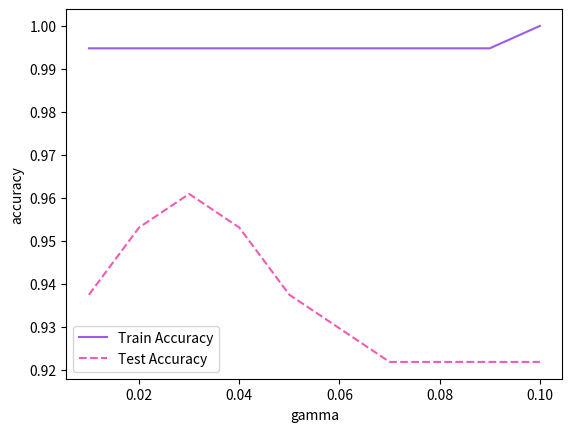

In [102]:
# Gamma별 정확도 그래프로 확인
plt.plot(para_gamma, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_gamma, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("gamma")
plt.legend();

- train의 성능이 가장 좋은 (떨어지기 전의) gamma = 0.03 선택

In [98]:
gamma = 0.03

#### 최종 모델

In [103]:
# 최종 모델
svc_scaled_final = SVC(gamma = 0.02, C = 1, random_state=1234)
svc_scaled_final.fit(df_scaled_train_x, df_train_y)
# 평가
y_pred_s = svc_scaled_final.predict(df_scaled_test_x)

# train 데이터 셋 정확도
print("Accucary on training set: {:.3f}".format(svc_scaled_final.score(df_scaled_train_x, df_train_y)))
# test 데이터 셋 정확도
print("Accuracy on test set: {:.3f}\n".format(svc_scaled_final.score(df_scaled_test_x, df_test_y)))
# confusion matrix
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred_s)))

# 목표변수의 빈도 불균형 : f1 score로 모델 평가 
print(classification_report(df_test_y, y_pred_s, digits=3))

SVC(C=1, gamma=0.02, random_state=1234)

Accucary on training set: 0.995
Accuracy on test set: 0.953

Confusion matrix: 
[[92  5]
 [ 1 30]]
              precision    recall  f1-score   support

           0      0.989     0.948     0.968        97
           1      0.857     0.968     0.909        31

    accuracy                          0.953       128
   macro avg      0.923     0.958     0.939       128
weighted avg      0.957     0.953     0.954       128



- test set에 대한 정확도 95.3%
- 1 기준 f1-score 90.9%

<모델 설명과 생각>
- recall 96.8%, precision 85.7%로 recall의 점수를 더 높도록 그래프 모양을 보고 더 세밀하게 살펴보고 싶은 부분을 범위를 다시 지정하며 모델을 계속 조정했습니다. 
- 암을 판단하는 모델을 만들면서 어떤 평가지표를 더 중요하게 봐야할지 고민해보았는데,
> 거짓 양성(FP) : not 암, 암판정
> 거짓 음성(FN) : true 암, 정상 판정
이 두 지표 중 거짓음성, 암환자인데 정상으로 판단하는 위험을 줄이는 것이 더 중요해 그것을 바탕으로 모델을 선택해야겠다고 생각했습니다.\
따라서 precision = TP/(TP+FP)보다, 거짓 음성이 포함된 recall = TP/(TP+FN)의 지표를 더 높이려고 했습니다.\
recall = TP/(TP+FN)에서는 FN( = 암환자인데 정상으로 판단 오류일 경우)가 낮아지면 recall은 높아지기 때문입니다.

암환자를 판단하는 등의 거짓음성 판단 오류가 위험한 모델에서는 recall 점수가 중요할 것 같습니다.

#### Grid Search

In [104]:
estimator = SVC(random_state=1234)
# 구하고자 하는 parameter와 범위
param_grid = {"C": para_c,
              "gamma": para_gamma}
# 정확도가 높은 최적 parameter 찾기
grid_rf = GridSearchCV(estimator, param_grid, scoring="accuracy", n_jobs = -1)
grid_rf.fit(df_scaled_train_x, df_train_y)
print("best estimator model: \n{}".format(grid_rf.best_estimator_))
print("\nbest parameter: \n{}".format(grid_rf.best_params_))
print("\nbest score: \n{}".format(grid_rf.best_score_.round(3)))

GridSearchCV(estimator=SVC(random_state=1234), n_jobs=-1,
             param_grid={'C': [0.05, 0.1, 0.15000000000000002, 0.2, 0.25,
                               0.30000000000000004, 0.35000000000000003, 0.4,
                               0.45, 0.5, 0.55, 0.6000000000000001, 0.65,
                               0.7000000000000001, 0.75, 0.8,
                               0.8500000000000001, 0.9, 0.9500000000000001,
                               1.0],
                         'gamma': [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07,
                                   0.08, 0.09, 0.1]},
             scoring='accuracy')

best estimator model: 
SVC(C=0.8500000000000001, gamma=0.01, random_state=1234)

best parameter: 
{'C': 0.8500000000000001, 'gamma': 0.01}

best score: 
0.984


그리드서치 결과 c=0.85, gamma=0.01에서 best score 98.4%

### 결과 시각화

**1. grid search로 찾은 raw data를 이용한 서포트벡터머신과 스케일된 데이터를 이용한 서포트벡터머신의 비교**

In [142]:
comparision = {'test accuracy':[0.891, 0.953], 'f1-score':[0.781, 0.909]}
cp = pd.DataFrame(comparision)
cp.index = ['raw data svm','scaled data svm']
cp.plot.bar()

<AxesSubplot:>

- 서포트벡터머신은 거리기반 모델이기 때문에 scale 변환이 꼭 필요함을 알 수 있었습니다.

**2. scaled data를 이욯한 svm의 혼동행렬**

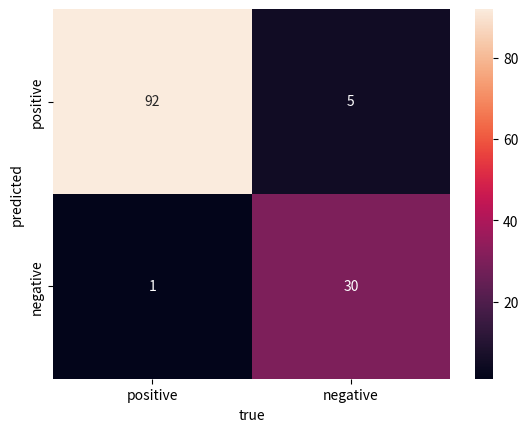

In [145]:
cm = pd.DataFrame(confusion_matrix(df_test_y, y_pred_s))
cm.index = ['positive', 'negative']
cm.columns = ['positive', 'negative']
sns.heatmap(cm, annot=True)
plt.ylabel('predicted')
plt.xlabel('true')
plt.show();

- 혼동행렬 결과 중요하게 생각한 FN의 데이터 개수가 1개임을 알 수 있습니다.